In [1]:
import os

import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from models.unet_vanilla import UNet
from preprocessing.preprocessor import ImagePreprocessor
from utils.trainer import Callback, SummaryWriter, trainer, batch_generator
from utils.evaluation import analyzer, jaccard_loss, dice_loss

City: 'Kabul'


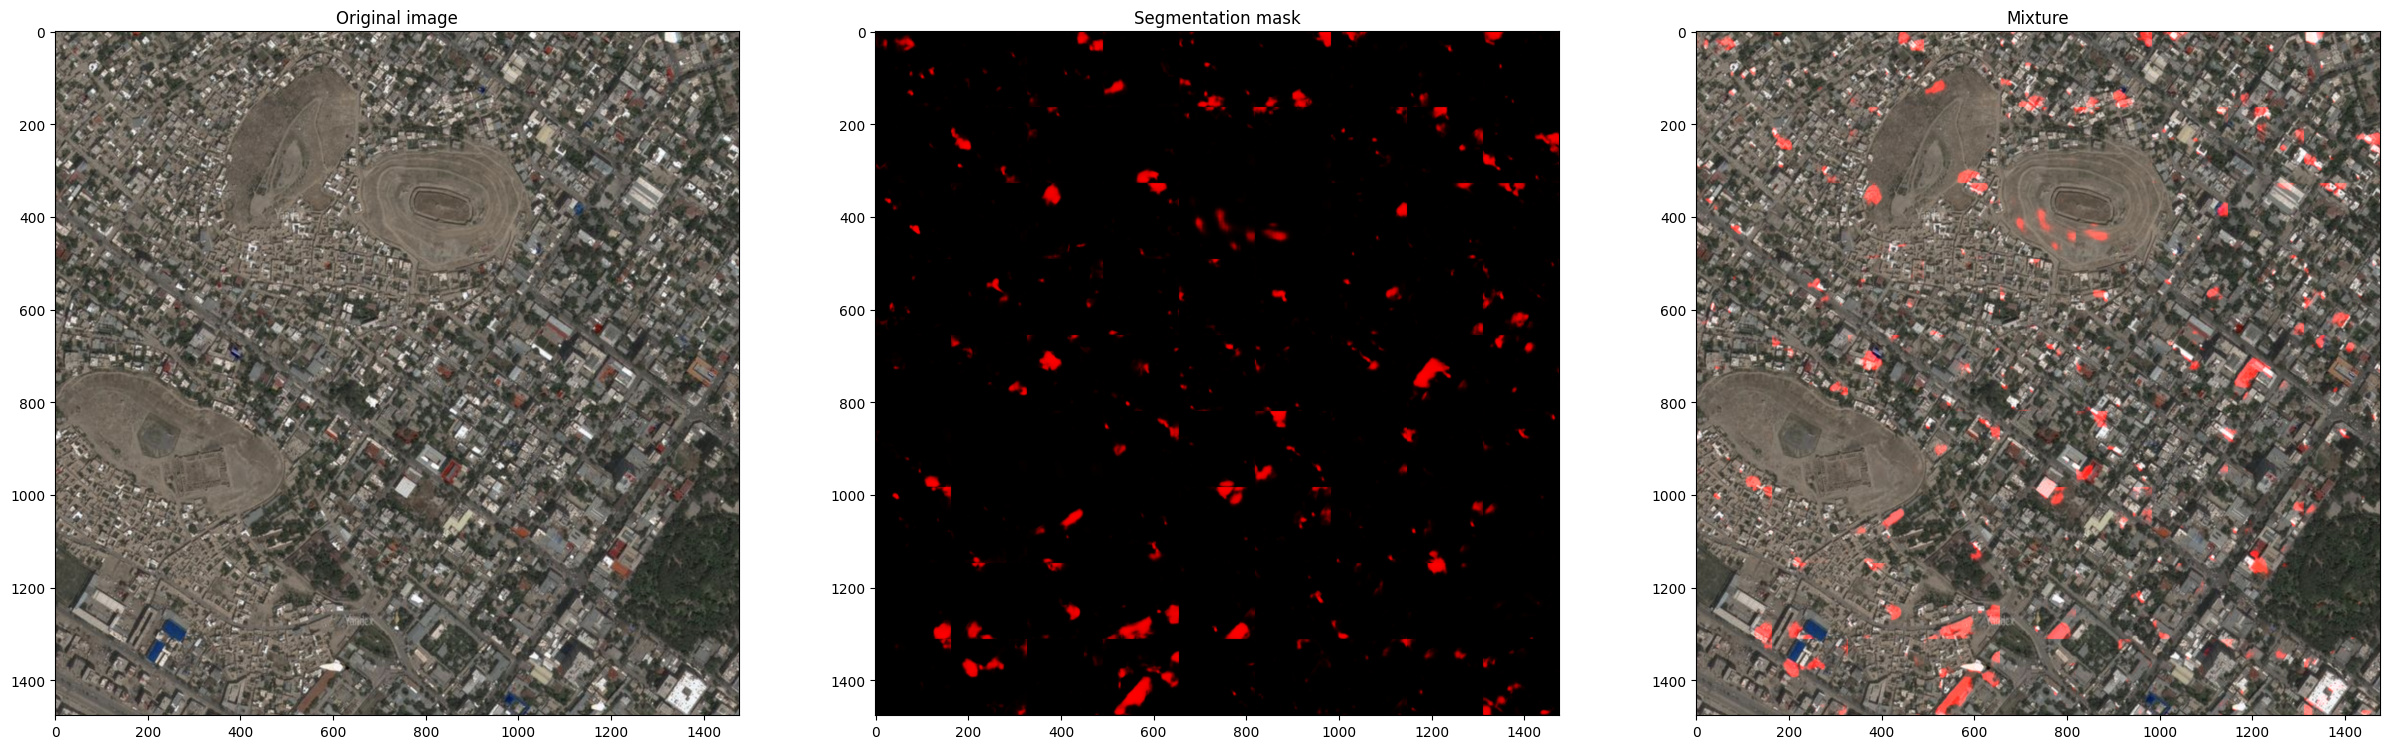

City: 'Budva'


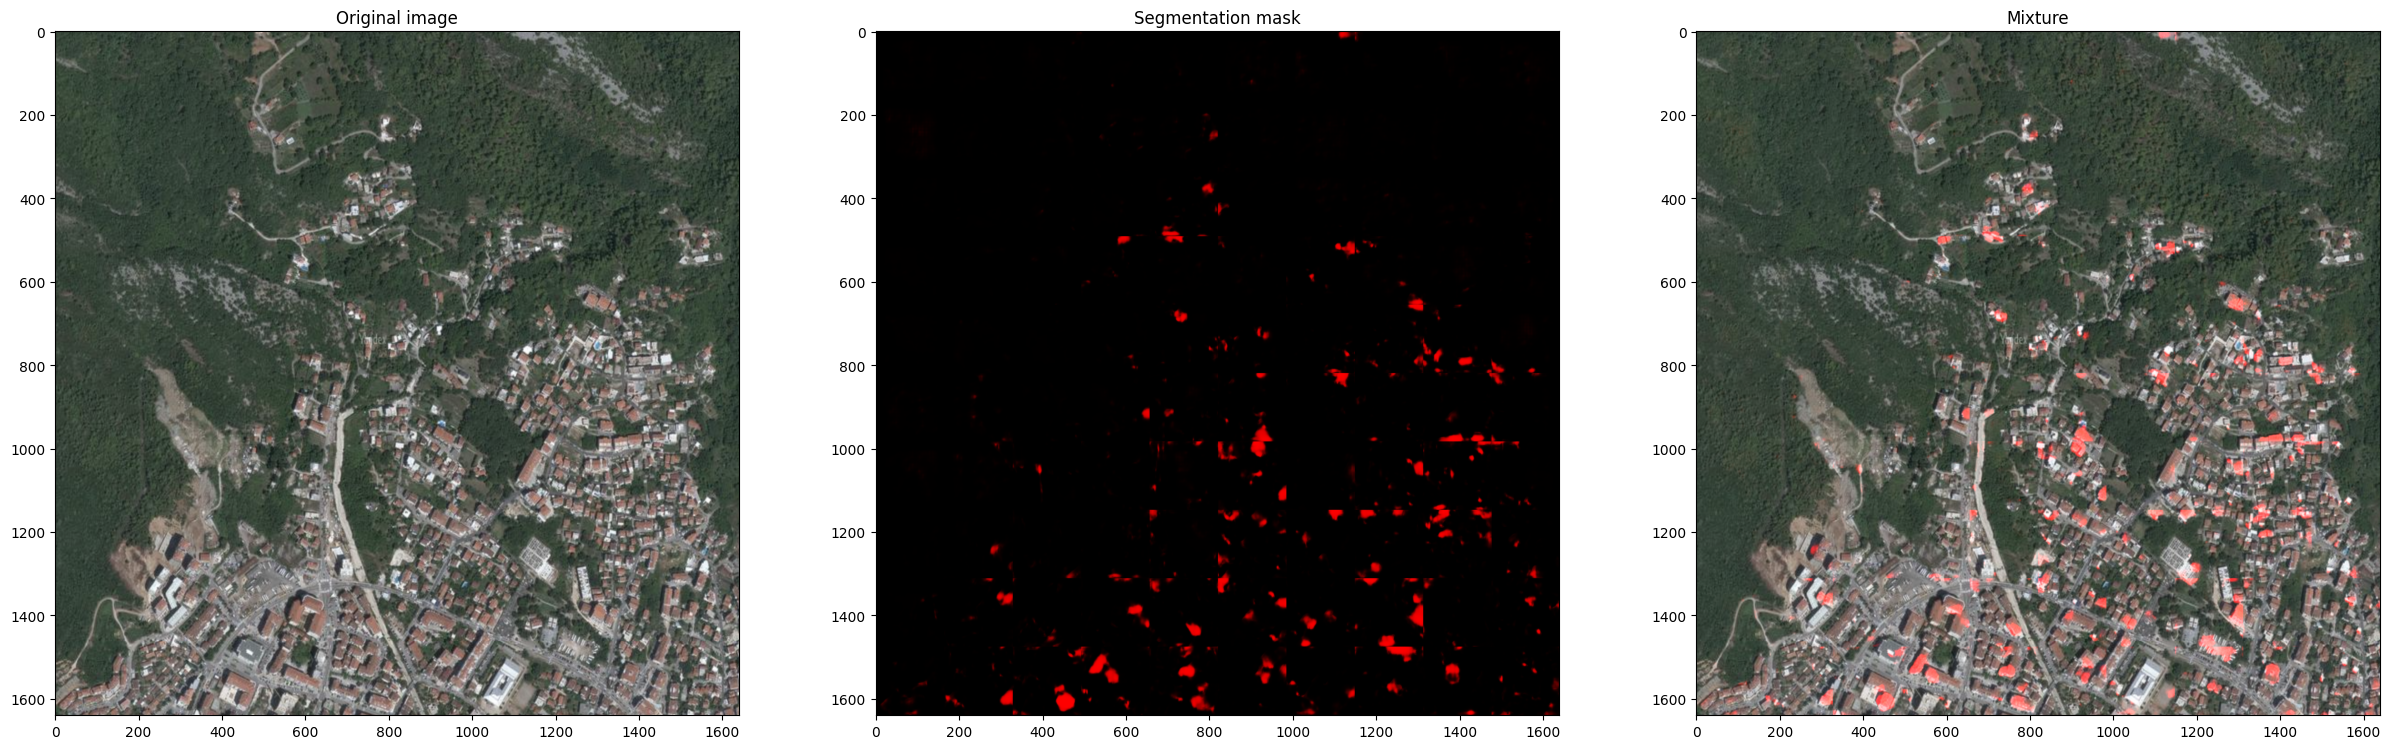

City: 'Podgorica'


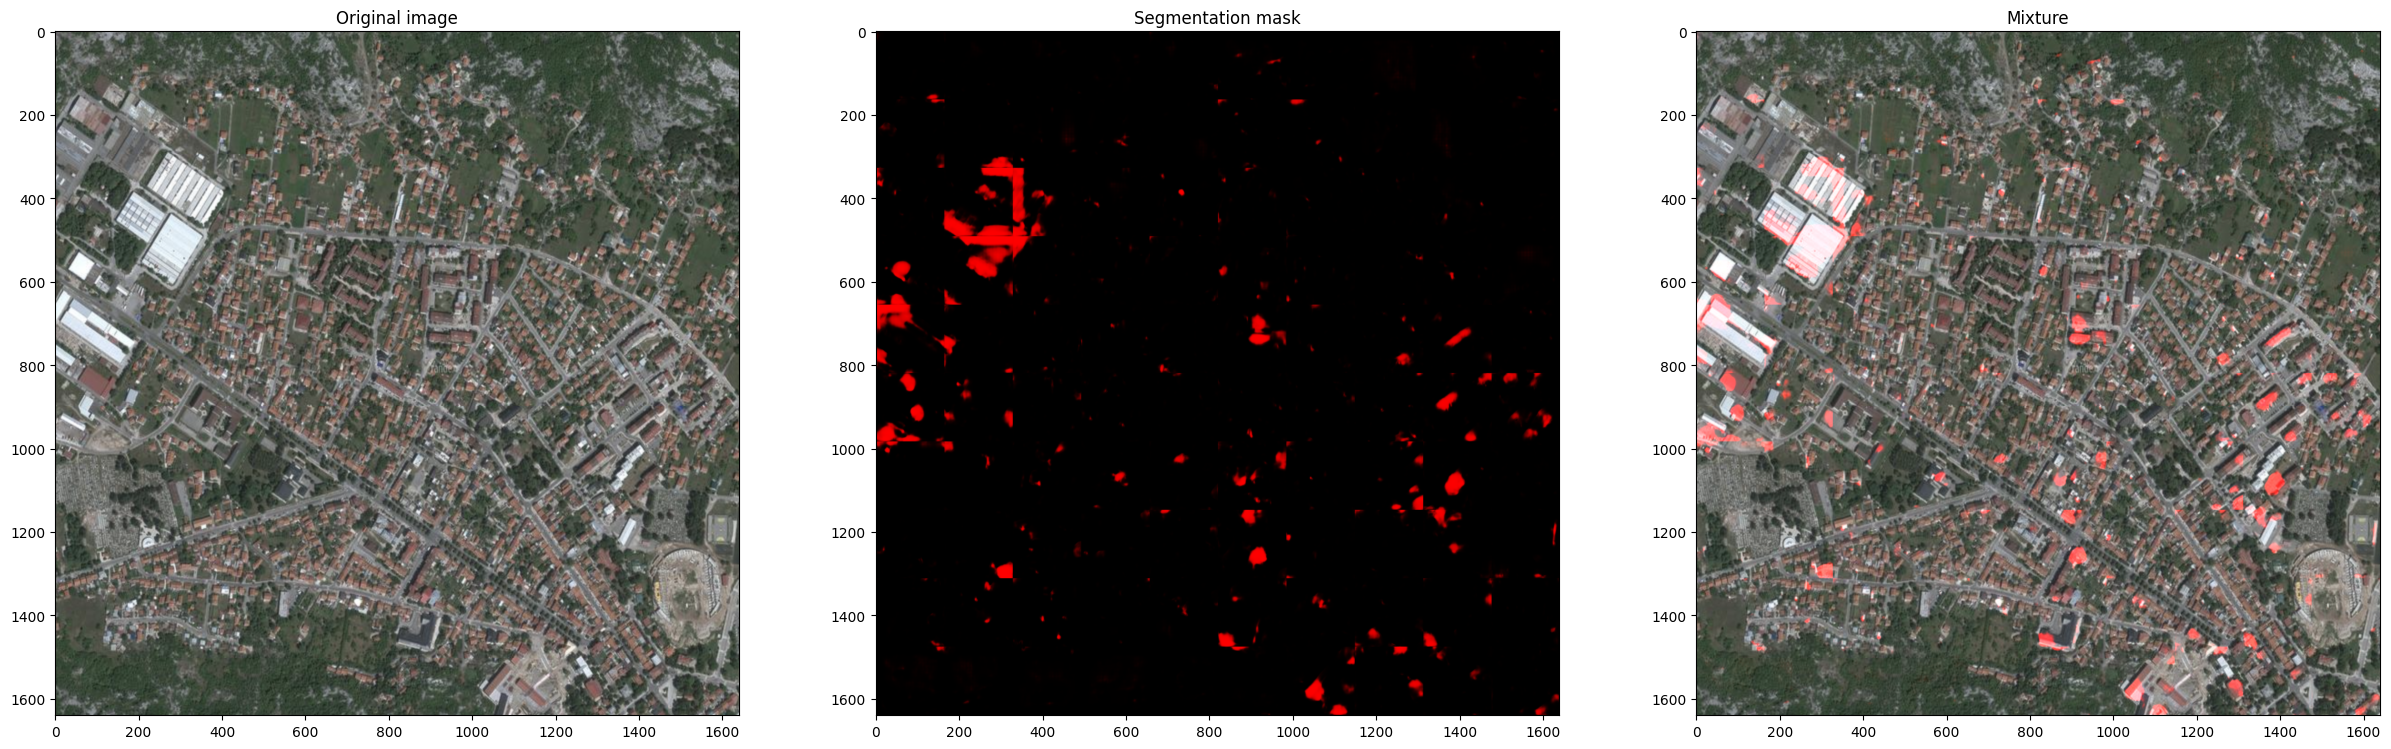

In [3]:
P = ImagePreprocessor()

# Инициализируем модель
model = torch.load("saved_models/test_0.9/BCELoss()/small_UNet.Adam.0.0001")

r_images = []
r_segments = []
for city in ["Kabul", "Budva", "Podgorica"]:
    img = cv2.imread(f"data/{city}.png")

    # Нарезаем их в тензорном виде
    t_images = P.destruct_to_chunks(img, chunk_size=164, output_size=256, mask=False, as_tensor=True)

    # Реконструктим их в отдельное изображение
    rec_img = P.unite([P.to_img(t_images[i]) for i in range(len(t_images))])

    # Получаем предсказание модели по всем сегментам
    segms = []
    for i in range(len(t_images)):
        out = model(t_images[i:i+1])[0].detach()
        segms.append(P.to_img(out))
        
    print(f"City: '{city}'")
    
    # Объединяем всё в единую маску
    rec_segm = P.unite(segms, mask=True)
    
    # Храним все резы
    r_images.append(rec_img)
    r_segments.append(rec_segm)
    
    # Рисуем результат
    P.show(rec_img, rec_segm)